Considering the localization as part of a mobile robot can increase the robot's applications and performance exponentially. In our particular case, the localization of the robot is going to be added in mapping, motion control and path planning steps of our robot. 

Localization will give us a vector 1x3 of the robot state respect to a certain world frame. The state of the robot is ($x,y,\phi$). 



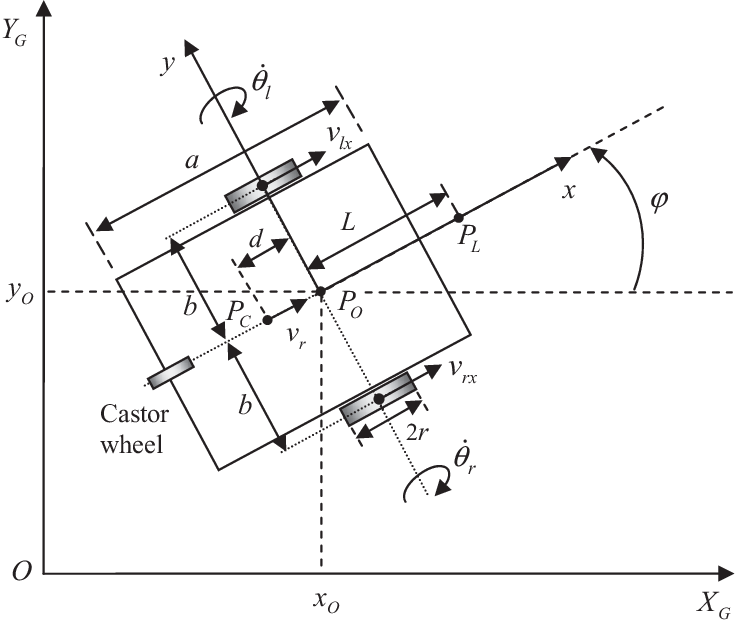

In [5]:
from IPython.display import Image
Image(filename='robot.png')

The motion of our robot can be studied as a differential drive model on which two control inputs can be received: Right wheel's angular velocity($\dot{\theta_{r}}$) and Left wheel's angular velocity($\dot{\theta_{l}}$). From wheels velocity, we can compute the forward($V_{r}$) and turning($\Omega$) velocity of the robot, that is going to give us a better understanding of the robot motion in the map : 

$$V_{r} = \frac{R}{2}(\dot{\theta_{r}}+ \dot{\theta_{l}} )$$
$$\Omega = \frac{R}{L}(-\dot{\theta_{r}} + \dot{\theta_{l}})$$

Been R, the radius of the wheel and L the width between wheels.

Knowing the robot's forward velocity and turning velocity, the robot's state velocities in world frame($x,y,phi$) can be computed with a simple geometrical transformation:

$$V_{x} = V_{r}cos(\phi)$$
$$V_{y} = V_{r}sin(\phi)$$
$$\dot{\phi} = \Omega$$

and so, considering linear sampling time(Ts), we can integrate the robot's state($x,y,phi$) : 

$$x_{k} = x_{k-1} + V_{r}*T_{s}cos(\phi_{k-1} + \frac{\Omega*Ts}{2})$$
$$y_{k} = y_{k-1} + V_{r}*T_{s}sin(\phi_{k-1} + \frac{\Omega*Ts}{2})$$
$$\phi_{k} = \phi_{k-1} + \Omega*Ts $$

From the model above, we can compute the robot's position in world frame as long as we know we wheel's velocity for each sampling. 

This model doesn't have sensory feedback and it's value ramains on the assumption that the wheels velocity will remain constant during the sampling time. 

A better approach for computing the real robot's state is considering the odometry readings on each iteration. Instead of considering ($\dot{\theta_{r}}Ts,\dot{\theta_{l}}Ts$) we can use ($\Delta\theta_{r},\Delta\theta_{l} $) and so : 

$$\Delta R  = \frac{R}{2}(\Delta\theta_{r}+\Delta\theta_{l} )$$
$$\Delta \phi = \frac{R}{L}(-\Delta\theta_{r} + \Delta\theta_{l})$$

and the state estimation is : 

$$x_{k} = x_{k-1} + \Delta R cos(\phi_{k-1} + \frac{\Delta \phi}{2})$$
$$y_{k} = y_{k-1} + \Delta R sin(\phi_{k-1} + \frac{\Delta \phi}{2})$$
$$\phi_{k} = \phi_{k-1} + \Delta \phi $$


Of course trusting completely on our encoders is nto going to be a good approach for a good localization during long periods. The noise covariance matrix of our model will increase on every iteration and so the position uncertainty is going to be bigger and bigger on every iteration. 

In order to improve the state estimation Kalman Filter is one of the most common solutions and we will face this direction.



